文件"全球重要指数.xlsx" 包含了全球重要指数的日收盘价。完成以下作业

1. 读入数据，对每个指数做基本统计分析，包括：
    + 计算周，月，季度和年对数收益率
    + 分析对每个指数，每种（周，月，季度，年）收益率的分布（利用直方图，qq图等工具）
    + 计算日，月度简单收益率，完成
    + 选择所有指数都有数据对时间点为起点，将所有指数该时间点的价格标准化为100，利用日简单收益率推算各指数后面对价格，并在图中画出走势图。对走势图进行描述和分析。
    + 在上述指数中选出3-6只，利用月度收益率进行投资组合分析，在允许卖空和禁止卖空对条件下计算有效前沿和最小方差组合。
    + 重新考虑上述投资组合分析，将数据分为2组（按时间先后等分），分析投资组合的变化。

In [133]:
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
from scipy.stats import probplot
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline

In [148]:
data=pd.read_excel('全球重要指数.xlsx')
data=data.iloc[1:]
columns=data.iloc[0]
data.columns=columns
data=data.iloc[2:]
start_date=datetime(1900,1,1)
data['日期']=data['日期'].apply(lambda x: (start_date+timedelta(days=x)))
data.index=data['日期']
data.drop('日期',axis=1,inplace=True)
data=data.fillna(0)

#巴西IBOVESPA指数从2002-10-13T00:00:00.000开始不是零
#韩国综合指数从2007-06-17T00:00:00.000开始不是零

# 1.计算周，月，季度和年对数收益率
# 3.计算日，月度简单收益率，完成

In [149]:
data.index = pd.to_datetime(data.index)
for i in data.columns:
    print('指数：',i)
    if i=='巴西IBOVESPA指数':
        start_date=datetime(2002,10,13)
    elif i=='韩国综合指数':
        start_date=datetime(2007,6,17)
    else:
        start_date=datetime(2000,1,6)

    #1.计算周，月，季度和年对数收益率
    target=data[i][start_date:]
    target_day=(1+target.pct_change()).map(np.math.log).dropna()
    target_week=target_day.resample('W').sum()
    target_month=target_day.resample('M').sum()
    target_quarter=target_day.resample('Q').sum()
    target_year=target_day.resample('A').sum()
    print("周对数收益率：\n",target_week)
    print("月对数收益率：\n",target_month)
    print("季度对数收益率：\n",target_quarter)
    print("年对数收益率：\n",target_year)

    #3.计算日，月度简单收益率

    print('日简单收益率是：\n',target_day.map(lambda x : (np.exp(x)-1)))
    print('月简单收益率是：\n',target_month.map(lambda x : (np.exp(x)-1)))

指数： 巴西IBOVESPA指数
周对数收益率：
 日期
2002-10-20    0.003775
2002-10-27    0.141271
2002-11-03    0.049296
2002-11-10   -0.014655
2002-11-17   -0.037013
                ...   
2023-10-29    0.017774
2023-11-05    0.048168
2023-11-12    0.020785
2023-11-19    0.042235
2023-11-26    0.000205
Freq: W-SUN, Name: 巴西IBOVESPA指数, Length: 1102, dtype: float64
月对数收益率：
 日期
2002-10-31    0.079633
2002-11-30    0.121655
2002-12-31    0.105911
2003-01-31   -0.040321
2003-02-28   -0.083793
                ...   
2023-07-31    0.036904
2023-08-31   -0.025788
2023-09-30   -0.052206
2023-10-31   -0.010669
2023-11-30    0.111393
Freq: M, Name: 巴西IBOVESPA指数, Length: 254, dtype: float64
季度对数收益率：
 日期
2002-12-31    0.307200
2003-03-31    0.069525
2003-06-30    0.290584
2003-09-30    0.174342
2003-12-31    0.353108
                ...   
2022-12-31    0.005149
2023-03-31   -0.069788
2023-06-30    0.255943
2023-09-30   -0.041090
2023-12-31    0.100723
Freq: Q-DEC, Name: 巴西IBOVESPA指数, Length: 85, dtype: float64
年对数收益率：


# 2.分析对每个指数，每种（周，月，季度，年）收益率的分布（利用直方图，qq图等工具）

指数： 巴西IBOVESPA指数
指数： 巴西IBOVESPA指数 的分布直方图
指数： 巴西IBOVESPA指数 的qq图
指数： 道琼斯工业指数
指数： 道琼斯工业指数 的分布直方图
指数： 道琼斯工业指数 的qq图
指数： 纳斯达克指数
指数： 纳斯达克指数 的分布直方图
指数： 纳斯达克指数 的qq图
指数： 标普500
指数： 标普500 的分布直方图
指数： 标普500 的qq图
指数： 英国富时100
指数： 英国富时100 的分布直方图


C:\Users\16017\AppData\Local\Temp\ipykernel_20288\1248139674.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(2, 4))


指数： 英国富时100 的qq图
指数： 法国CAC40
指数： 法国CAC40 的分布直方图
指数： 法国CAC40 的qq图
指数： 德国DAX
指数： 德国DAX 的分布直方图
指数： 德国DAX 的qq图
指数： 日经225
指数： 日经225 的分布直方图
指数： 日经225 的qq图
指数： 韩国综合指数
指数： 韩国综合指数 的分布直方图
指数： 韩国综合指数 的qq图
指数： 恒生指数
指数： 恒生指数 的分布直方图
指数： 恒生指数 的qq图
指数： 澳洲标普200
指数： 澳洲标普200 的分布直方图
指数： 澳洲标普200 的qq图
指数： 上证指数
指数： 上证指数 的分布直方图
指数： 上证指数 的qq图
指数： 深证成指
指数： 深证成指 的分布直方图
指数： 深证成指 的qq图
指数： 台湾加权指数
指数： 台湾加权指数 的分布直方图
指数： 台湾加权指数 的qq图


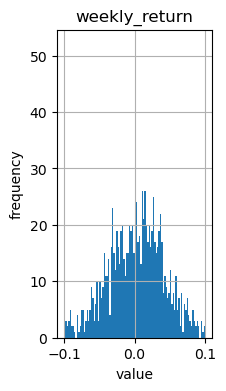

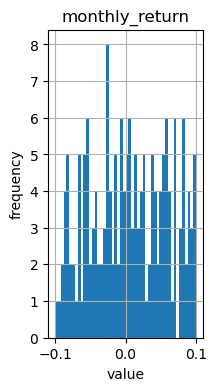

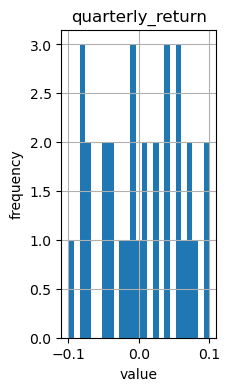

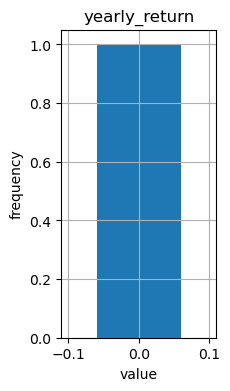

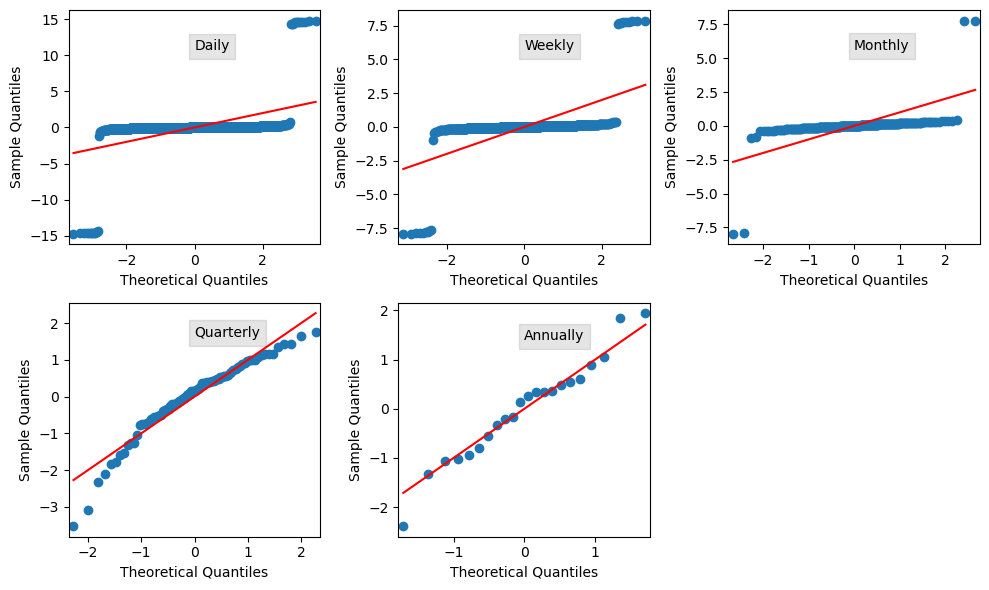

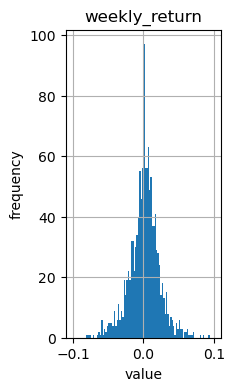

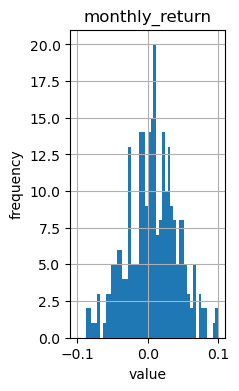

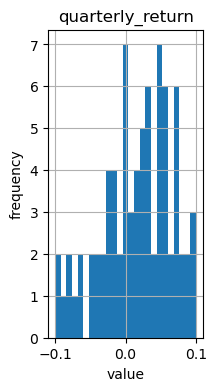

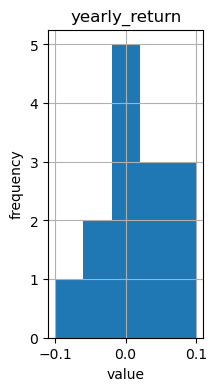

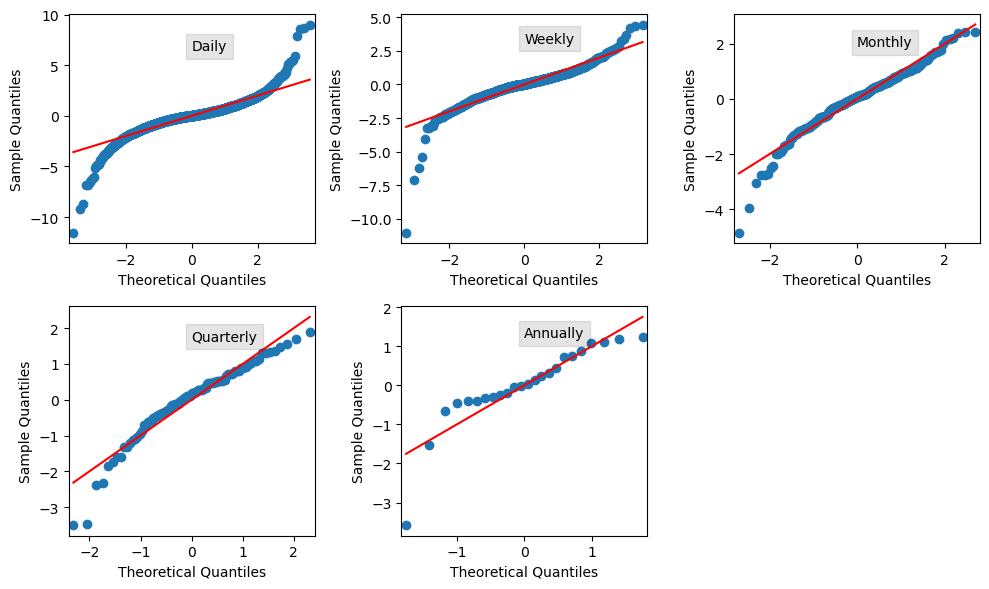

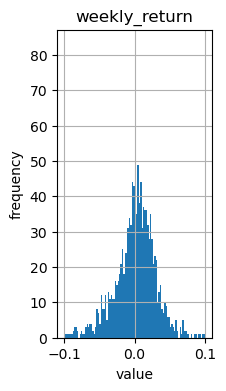

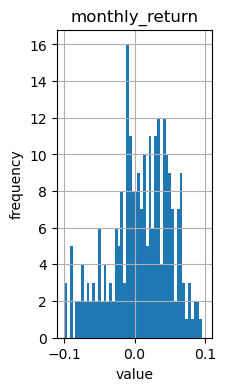

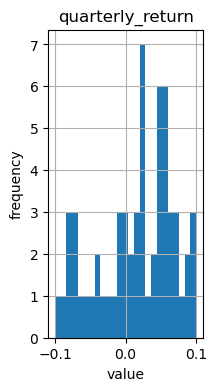

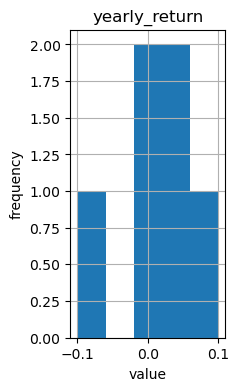

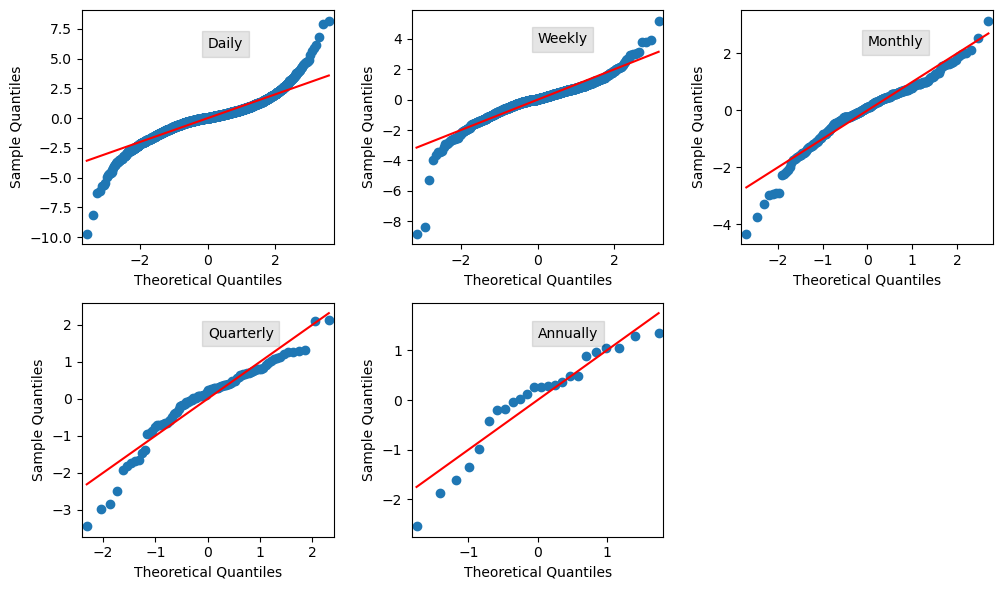

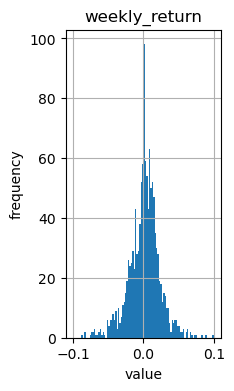

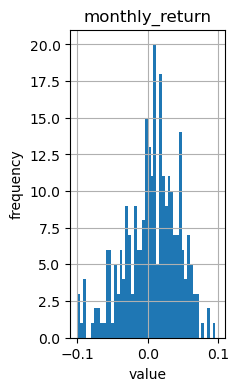

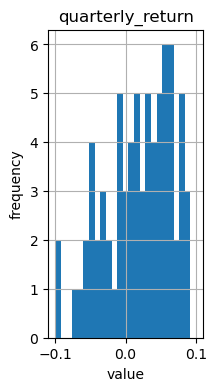

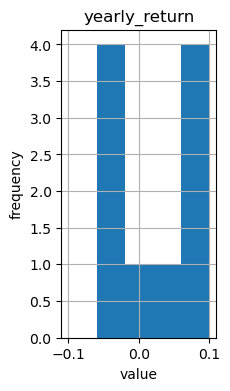

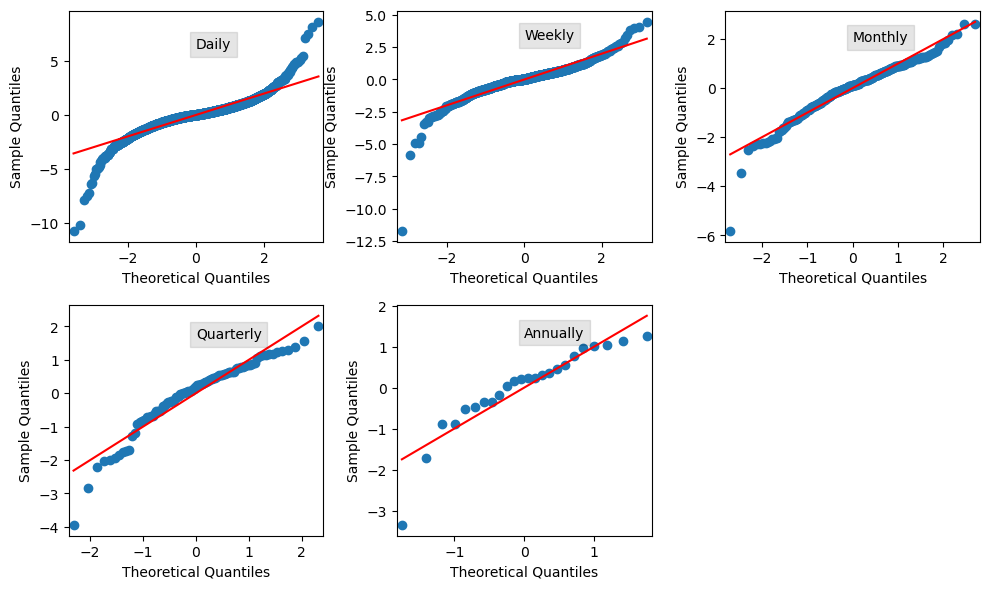

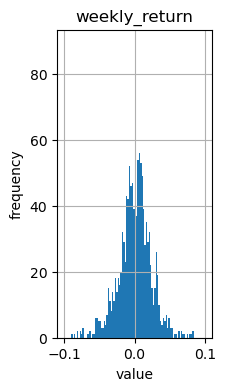

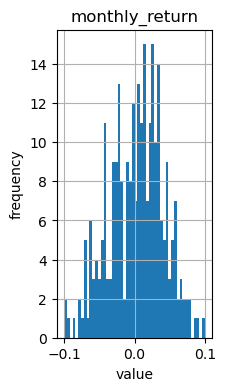

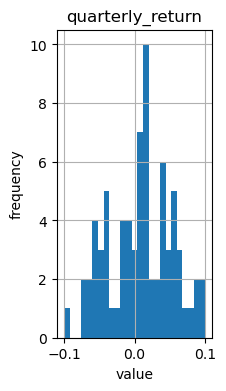

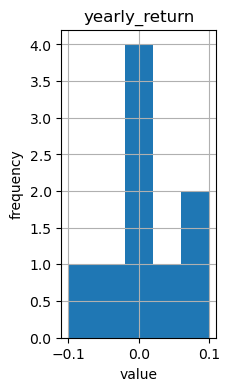

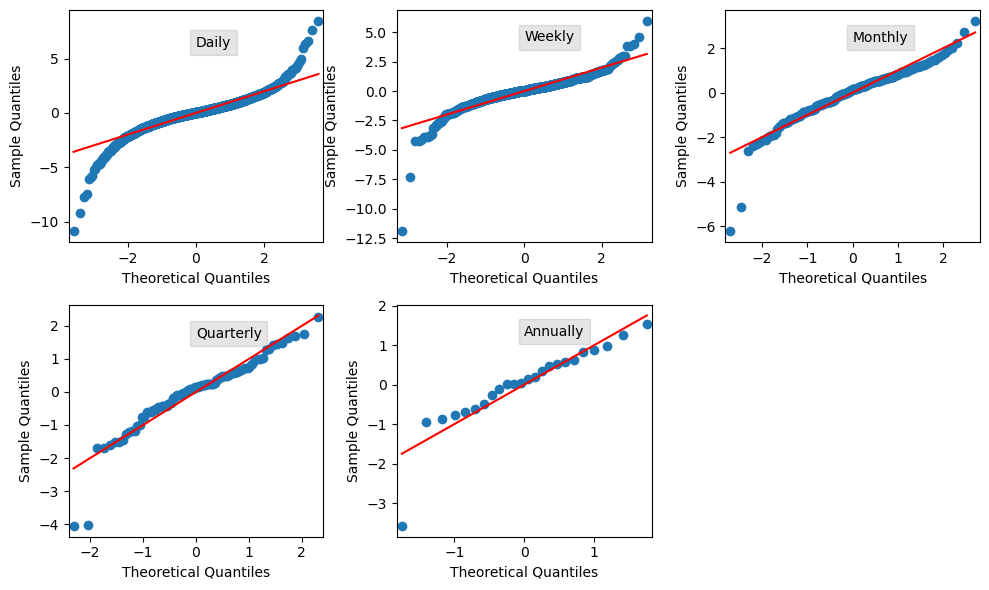

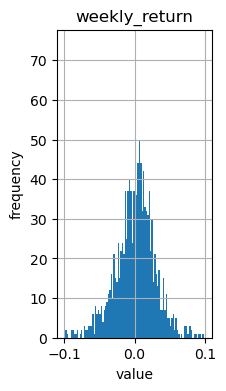

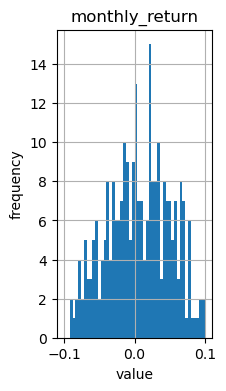

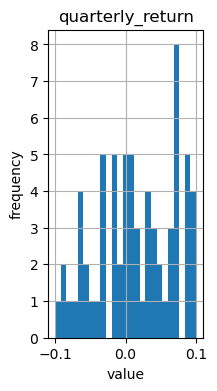

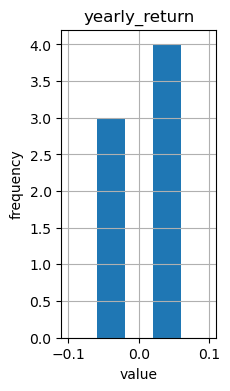

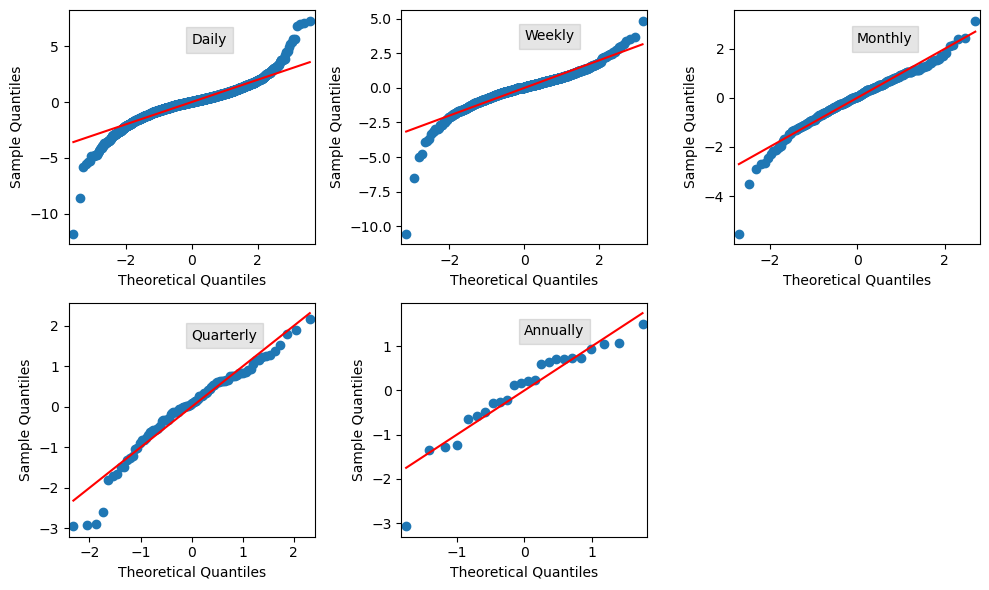

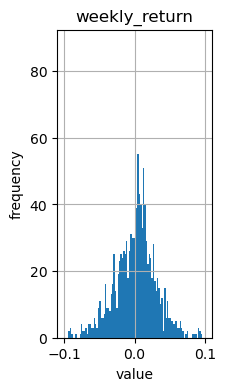

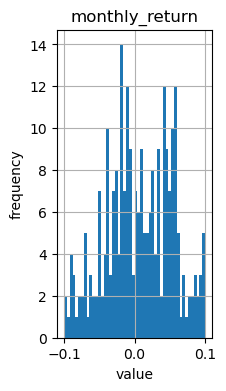

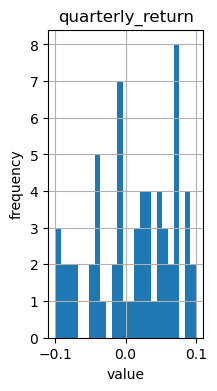

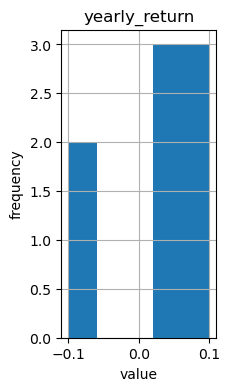

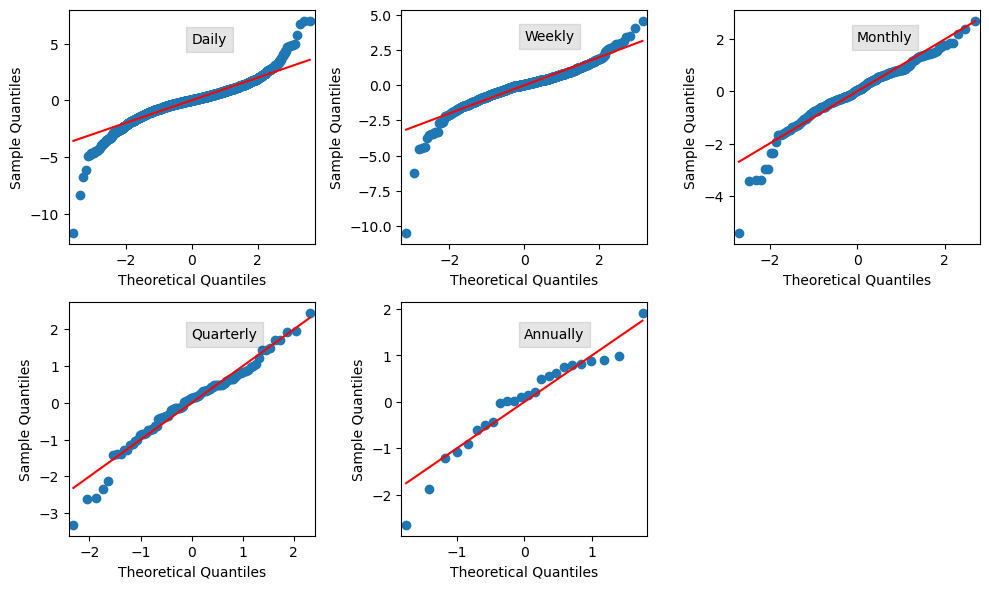

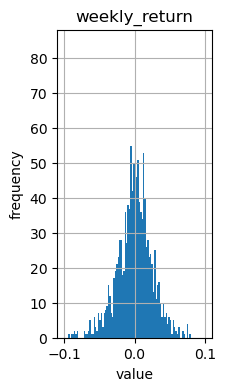

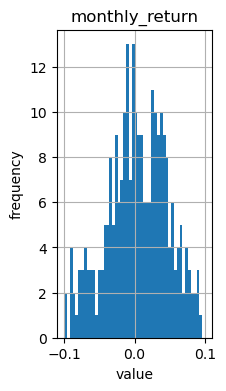

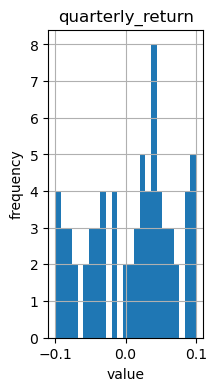

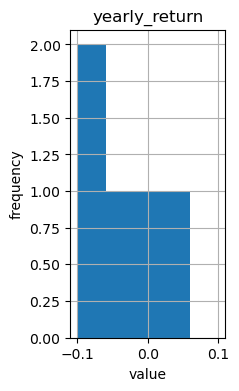

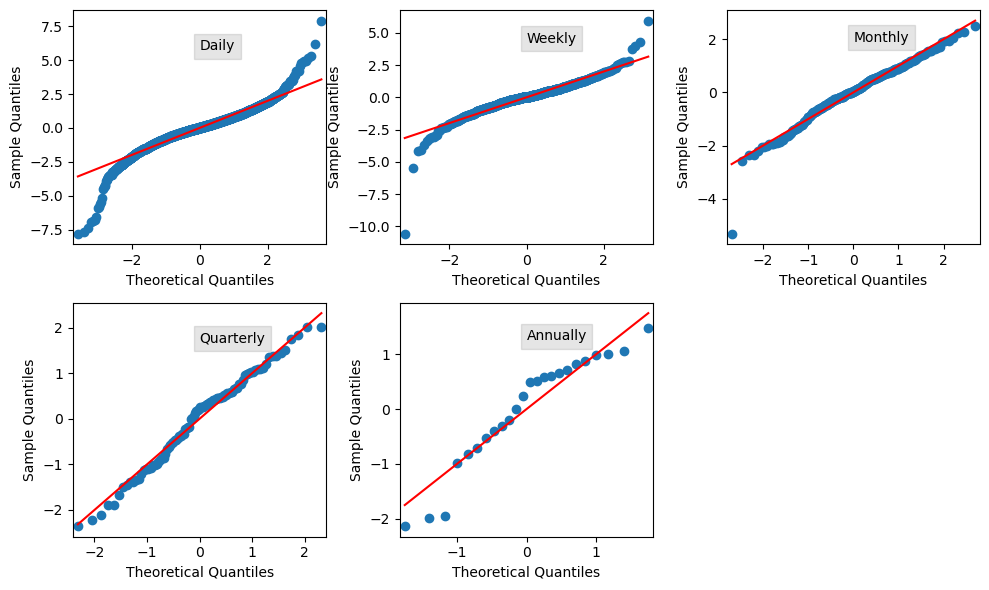

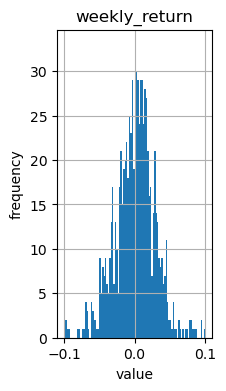

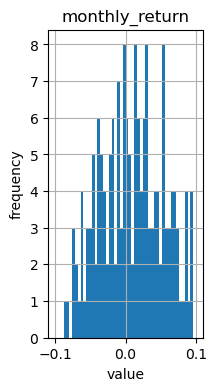

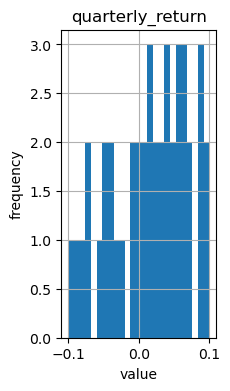

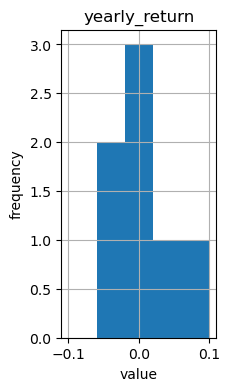

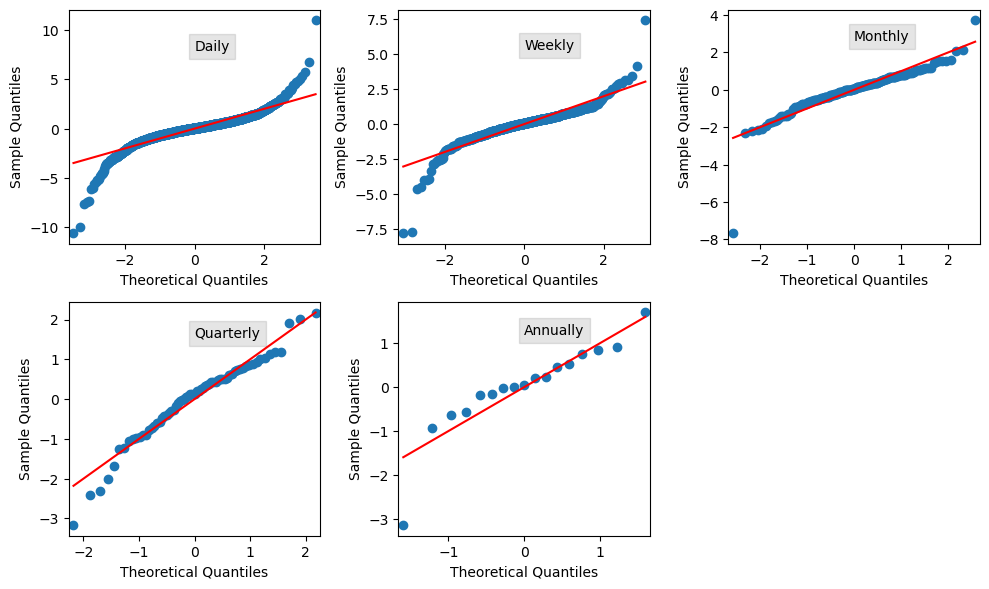

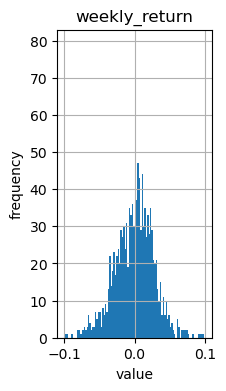

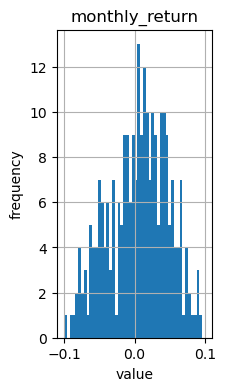

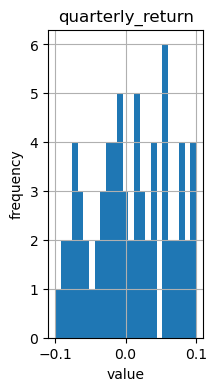

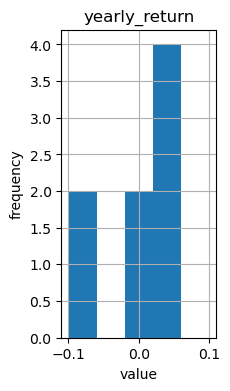

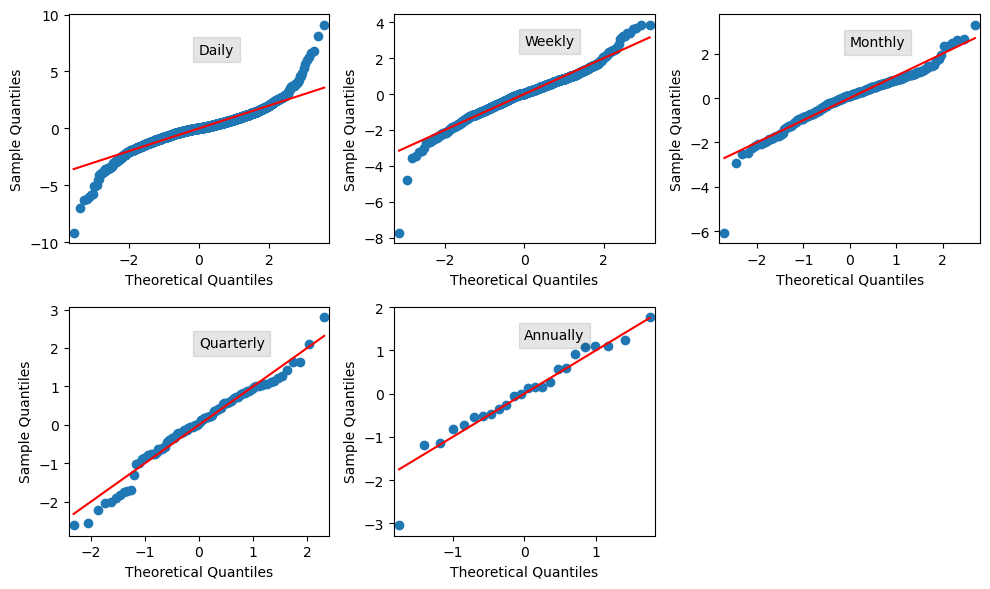

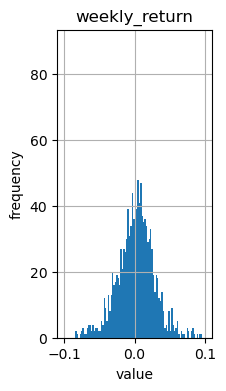

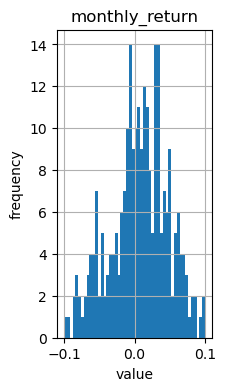

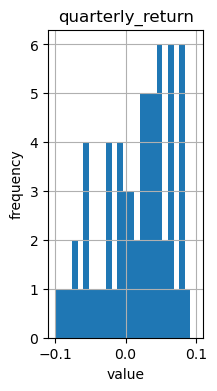

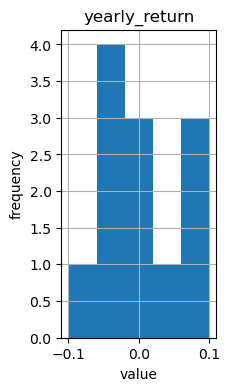

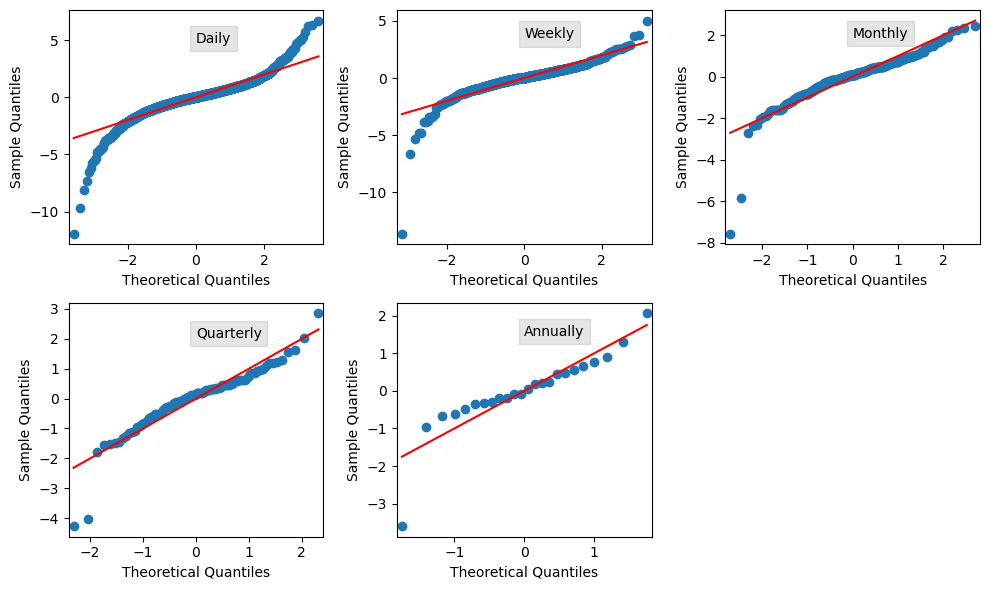

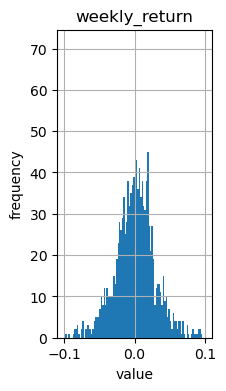

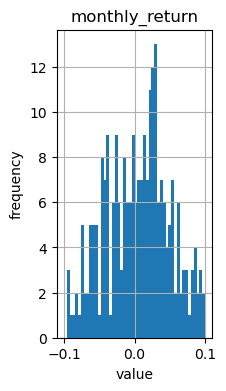

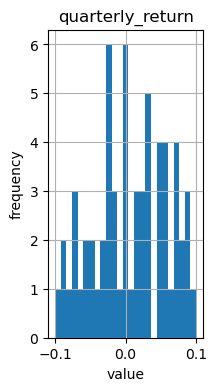

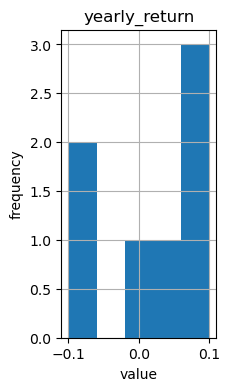

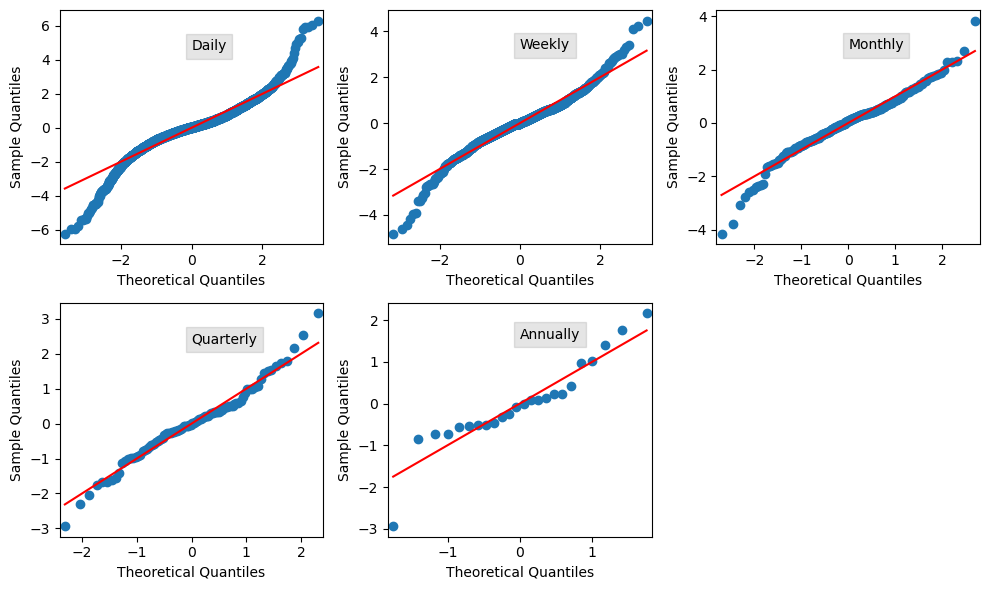

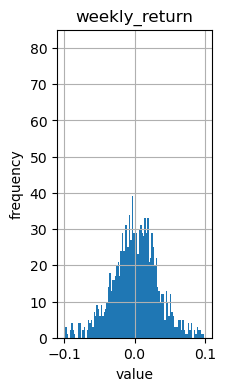

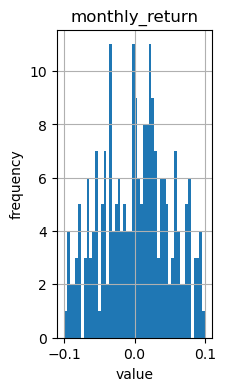

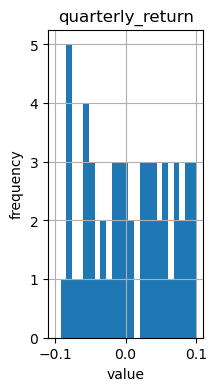

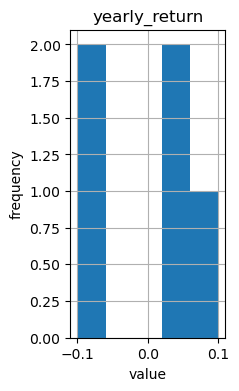

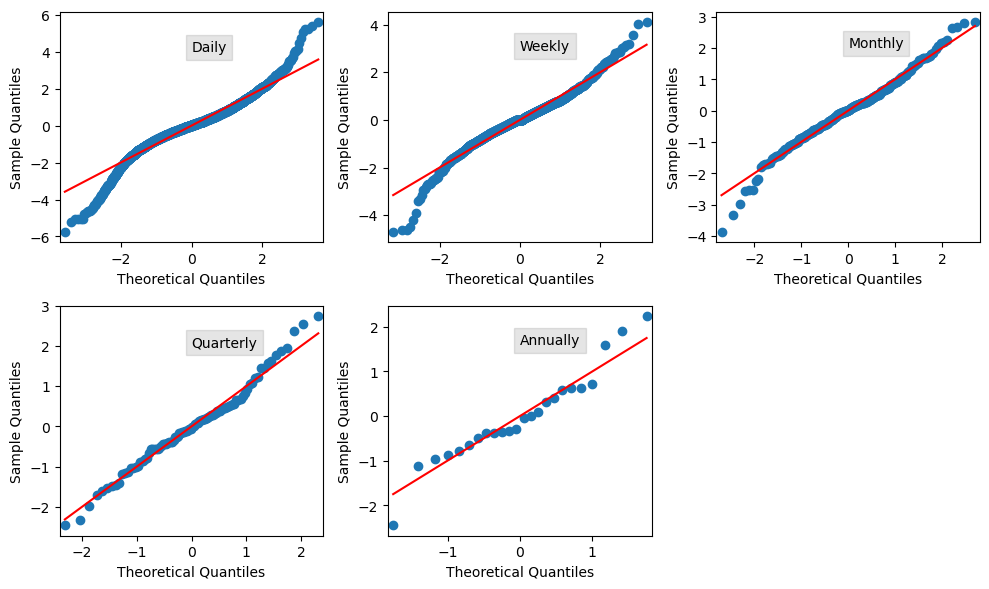

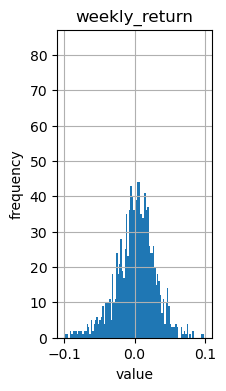

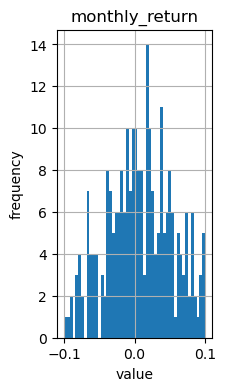

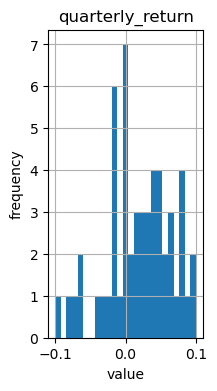

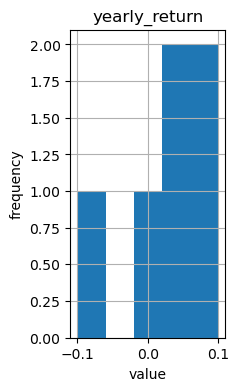

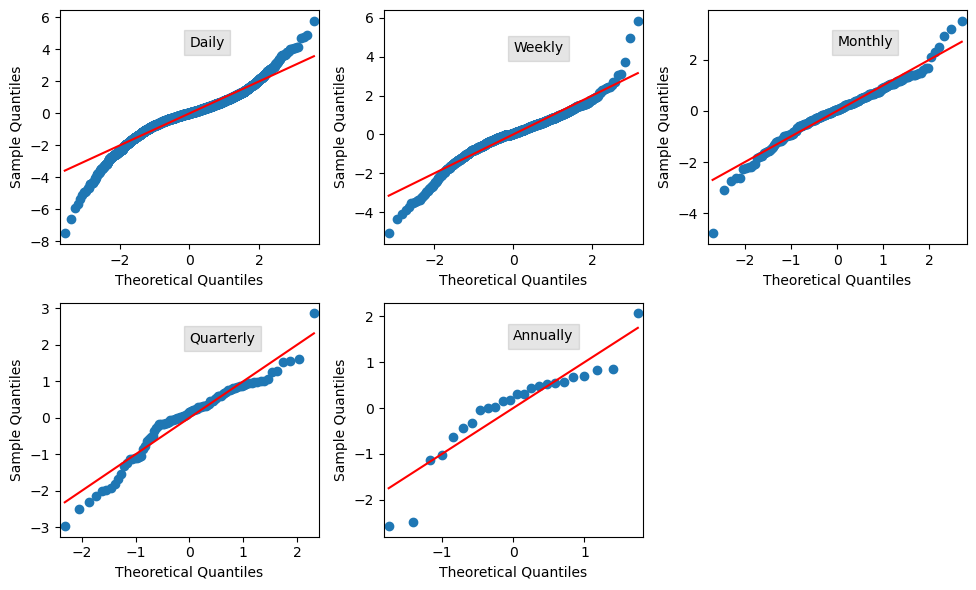

In [144]:
data.index = pd.to_datetime(data.index)
for i in data.columns:
    print('指数：',i)
    if i=='巴西IBOVESPA指数':
        start_date=datetime(2002,10,13)
    elif i=='韩国综合指数':
        start_date=datetime(2007,6,17)
    else:
        start_date=datetime(2000,1,6)

    target=data[i][start_date:]
    target_day=(1+target.pct_change()).map(np.math.log).dropna()
    target_week=target_day.resample('W').sum()
    target_month=target_day.resample('M').sum()
    target_quarter=target_day.resample('Q').sum()
    target_year=target_day.resample('A').sum()

    #2.分析对每个指数，每种（周，月，季度，年）收益率的分布（利用直方图，qq图等工具）

    #直方图
    print('指数：',i,'的分布直方图')
    plt.figure(figsize=(2, 4))
    plt.hist(target_week, bins=100,range=(-0.1,0.1))
    plt.grid(True)
    plt.xlabel('value')
    plt.ylabel('frequency')
    plt.title('weekly_return')

    plt.figure(figsize=(2, 4))
    plt.hist(target_month, bins=50,range=(-0.1,0.1))
    plt.grid(True)
    plt.xlabel('value')
    plt.ylabel('frequency')
    plt.title('monthly_return')

    plt.figure(figsize=(2, 4))
    plt.hist(target_quarter, bins=25,range=(-0.1,0.1))
    plt.grid(True)
    plt.xlabel('value')
    plt.ylabel('frequency')
    plt.title('quarterly_return')

    plt.figure(figsize=(2, 4))
    plt.hist(target_year, bins=5,range=(-0.1,0.1))
    plt.grid(True)
    plt.xlabel('value')
    plt.ylabel('frequency')
    plt.title('yearly_return')

    #qq图——参照老师上课的课件
    print('指数：',i,'的qq图')
    freqs=[ 'Daily', 'Weekly', 'Monthly','Quarterly','Annually']
    retlist=[target_day,target_week,target_month,target_quarter,target_year]
    left = 0 
    fig = plt.figure(figsize=(10,6))
    for i in range(5):
        ax = fig.add_subplot(2, 3, i+1)
        sm.qqplot(retlist[i],stats.norm,line='s',fit=True,ax=ax)
        top = ax.get_ylim()[1] * 0.75
        txt = ax.text(left, top, freqs[i], verticalalignment='top')
        txt.set_bbox(dict(facecolor='k', alpha=0.1))

    fig.tight_layout()

# 4.选择所有指数都有数据对时间点为起点，将所有指数该时间点的价格标准化为100，利用日简单收益率推算各指数后面对价格，并在图中画出走势图。对走势图进行描述和分析。

In [276]:
data=pd.read_excel('全球重要指数.xlsx')
data=data.iloc[1:]
columns=data.iloc[0]
data.columns=columns
data=data.iloc[2:]
start_date=datetime(1900,1,1)
data['日期']=data['日期'].apply(lambda x: (start_date+timedelta(days=x)))
data.index=data['日期']
data.drop('日期',axis=1,inplace=True)
data=data.fillna(0)

In [277]:
start_date=datetime(2007,6,17)
target1=data[start_date:].iloc[1:]#收盘价
target1

1,巴西IBOVESPA指数,道琼斯工业指数,纳斯达克指数,标普500,英国富时100,法国CAC40,德国DAX,日经225,韩国综合指数,恒生指数,澳洲标普200,上证指数,深证成指,台湾加权指数
日期,,,,,,,,,,,,,,
2007-06-20,218916.292556,103748.604474,20018.106580,11668.591365,101006.326950,62126.061615,82017.444332,1119.970580,14.606818,21039.432830,40814.06994,4253.3480,14194.5460,1971.937200
2007-06-21,218460.123391,103895.082690,20014.597820,11686.027150,100564.324400,62122.291605,82194.959880,1119.041848,14.612852,21034.900423,40955.39280,4269.5240,14336.4010,1971.079836
2007-06-22,212961.645683,102762.401560,19806.495280,11524.815120,100700.988780,62333.138042,82764.094602,1124.243430,14.411239,21133.662535,41252.32872,4181.3230,14107.2280,2021.732692
2007-06-23,216818.372908,103230.137472,19943.328768,11600.305552,100076.490800,61502.049063,81237.652587,1124.368573,14.513607,21408.437810,41174.11485,4230.8230,14255.6070,2057.202476
2007-06-24,212862.706026,101837.245824,19734.088704,11453.113344,99708.237020,61461.845325,81118.819483,1119.200970,14.311289,21463.992192,41290.63505,4091.4450,13725.7220,2059.439592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-17,183738.680768,251068.929992,101197.872768,32309.064576,67192.771177,56344.544072,123075.098184,1603.582448,13.691605,16619.301540,33182.42123,3072.8348,10077.9625,3871.104280
2023-11-18,185837.106840,250642.889028,101228.886708,32334.900576,66182.185391,55932.874680,123178.181847,1590.533974,13.749683,16382.298421,33059.42808,3050.9257,9954.4008,3887.555152
2023-11-19,185887.128258,250669.849984,101319.242944,32378.162656,66921.400650,56465.731287,124260.187212,1605.406145,13.737306,16055.760297,32825.53110,3054.3655,9979.6861,3909.873440


In [278]:
start_date=datetime(2007,6,17)
target2=data[start_date:].pct_change().dropna()#简单日收益率，这里的pct，target2(t)=[target1(t)-target1(t-1)]/target1(t-1)
target2

1,巴西IBOVESPA指数,道琼斯工业指数,纳斯达克指数,标普500,英国富时100,法国CAC40,德国DAX,日经225,韩国综合指数,恒生指数,澳洲标普200,上证指数,深证成指,台湾加权指数
日期,,,,,,,,,,,,,,
2007-06-20,0.007007,-0.002270,-0.000370,-0.001541,-0.000698,0.002511,0.006184,0.005977,0.019408,0.026481,0.015942,0.029151,0.036313,0.000870
2007-06-21,-0.002084,0.001412,-0.000175,0.001494,-0.004376,-0.000061,0.002164,-0.000829,0.000413,-0.000215,0.003463,0.003803,0.009994,-0.000435
2007-06-22,-0.025169,-0.010902,-0.010398,-0.013795,0.001359,0.003394,0.006924,0.004648,-0.013797,0.004695,0.007250,-0.020658,-0.015985,0.025698
2007-06-23,0.018110,0.004552,0.006909,0.006550,-0.006202,-0.013333,-0.018443,0.000111,0.007103,0.013002,-0.001896,0.011838,0.010518,0.017544
2007-06-24,-0.018244,-0.013493,-0.010492,-0.012689,-0.003680,-0.000654,-0.001463,-0.004596,-0.013940,0.002595,0.002830,-0.032943,-0.037170,0.001087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-17,0.004309,0.004471,0.000448,0.001374,0.020535,0.016994,0.022300,0.029737,0.029056,0.039482,0.028943,0.005486,0.007236,0.014391
2023-11-18,0.011421,-0.001697,0.000306,0.000800,-0.015040,-0.007306,0.000838,-0.008137,0.004242,-0.014261,-0.003707,-0.007130,-0.012261,0.004250
2023-11-19,0.000269,0.000108,0.000893,0.001338,0.011169,0.009527,0.008784,0.009350,-0.000900,-0.019932,-0.007075,0.001127,0.002540,0.005741


In [279]:
# 4.选择所有指数都有数据对时间点为起点，将所有指数该时间点的价格标准化为100，利用日简单收益率推算各指数后面对价格，并在图中画出走势图。对走势图进行描述和分析。
target1.iloc[0]=100
#逐行遍历使用对齐运算
for i in range(1,3998):
    target1.iloc[i]=target2.iloc[i]*target1.iloc[i-1]-target1.iloc[i-1]
target1

1,巴西IBOVESPA指数,道琼斯工业指数,纳斯达克指数,标普500,英国富时100,法国CAC40,德国DAX,日经225,韩国综合指数,恒生指数,澳洲标普200,上证指数,深证成指,台湾加权指数
日期,,,,,,,,,,,,,,
2007-06-20,1.000000e+02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2007-06-21,-1.002084e+02,-99.858814,-100.017528,-99.850575,-100.437599,-100.006068,-99.783564,-100.082925,-99.958693,-100.021542,-99.653740,-99.619688,-99.000637,-100.043478
2007-06-22,1.027305e+02,100.947491,101.057464,101.228042,100.301107,99.666642,99.092642,99.617715,101.337814,99.551926,98.931228,101.677659,100.583201,97.472559
2007-06-23,-1.008701e+02,-100.488016,-100.359307,-100.564973,-100.923125,-100.995500,-100.920236,-99.606626,-100.617977,-98.257573,-99.118800,-100.473962,-99.525273,-95.762476
2007-06-24,1.027104e+02,101.843908,101.412250,101.841006,101.294494,101.061520,101.067860,100.064418,102.020579,98.002597,98.838300,103.783923,103.224656,95.658338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-17,-3.636111e+28,-22.186967,-8.489119,-18.104495,-71.982974,-41.520007,-26.176692,-32.988069,-38.965297,-48.555418,-44.745567,-56.242068,-41.097759,-26.762345
2023-11-18,3.594584e+28,22.224617,8.486517,18.090018,73.065604,41.823364,26.154767,33.256495,38.800012,49.247852,44.911420,56.643070,41.601642,26.648614
2023-11-19,-3.593616e+28,-22.222226,-8.478942,-18.065815,-72.249506,-41.424925,-25.925022,-32.945533,-38.834938,-50.229479,-45.229170,-56.579207,-41.495969,-26.495626


In [280]:
target1.drop('巴西IBOVESPA指数',axis=1,inplace=True)


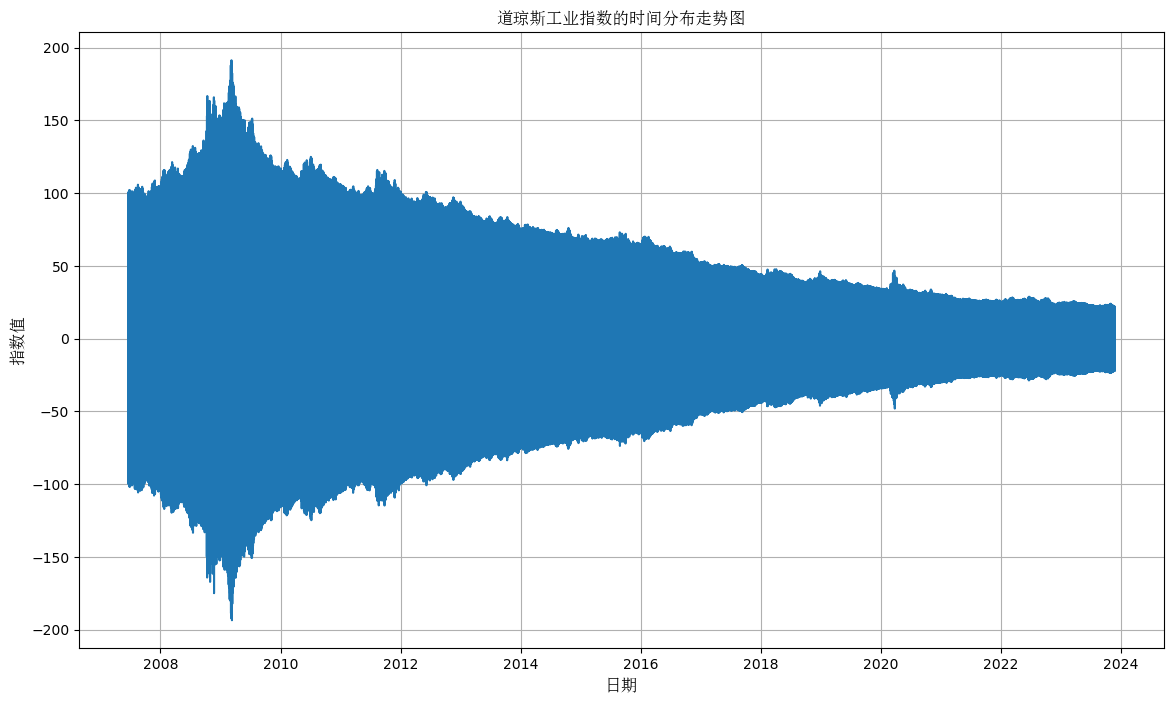

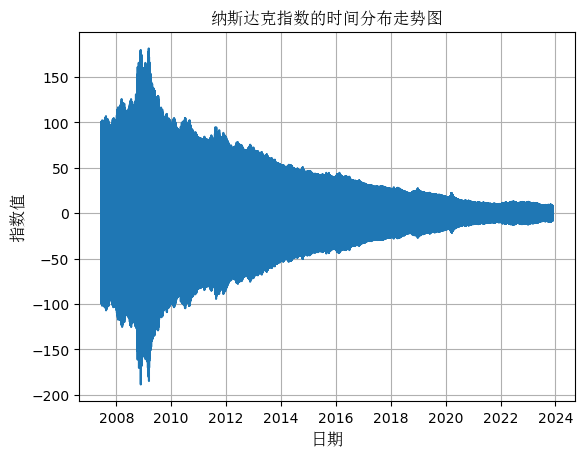

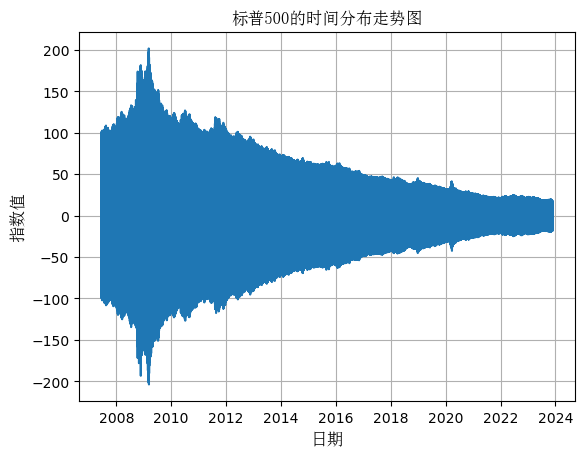

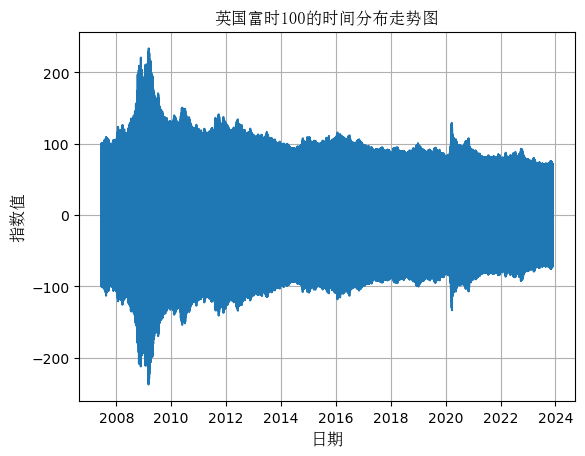

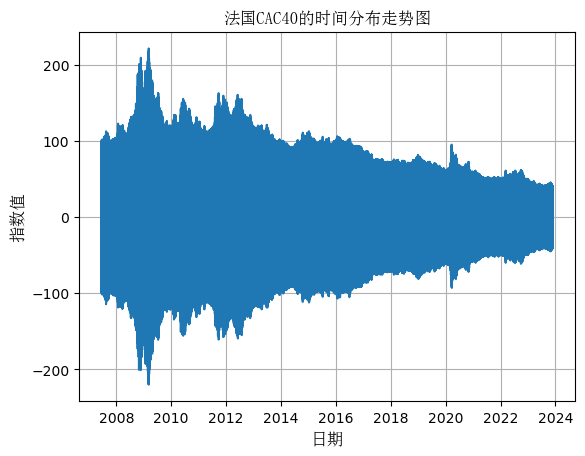

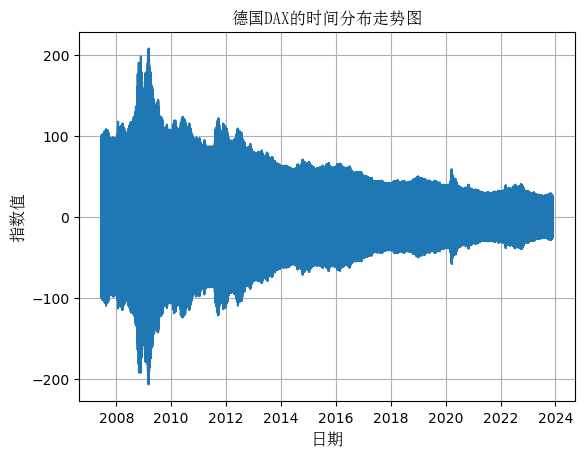

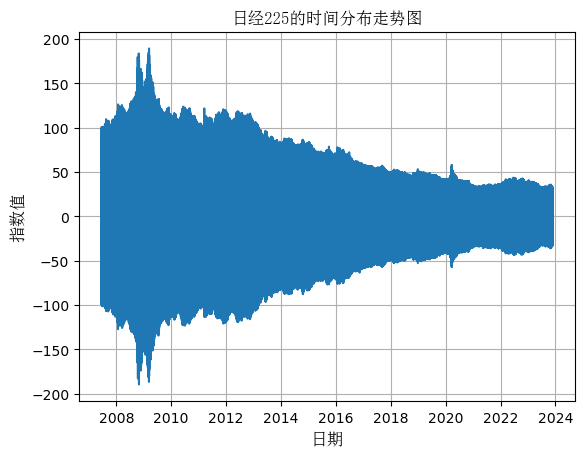

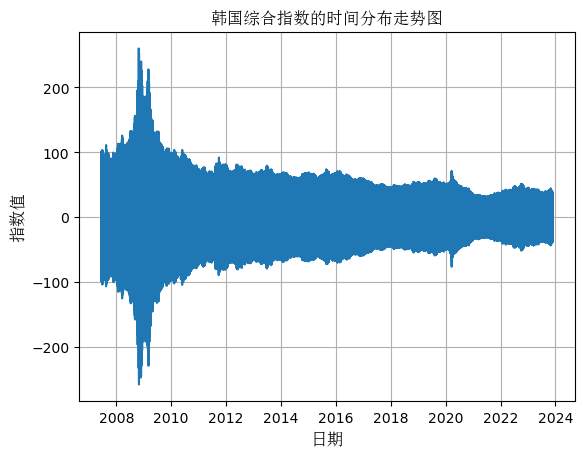

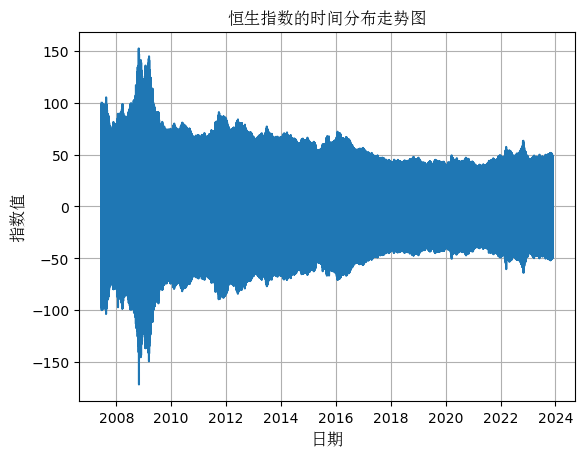

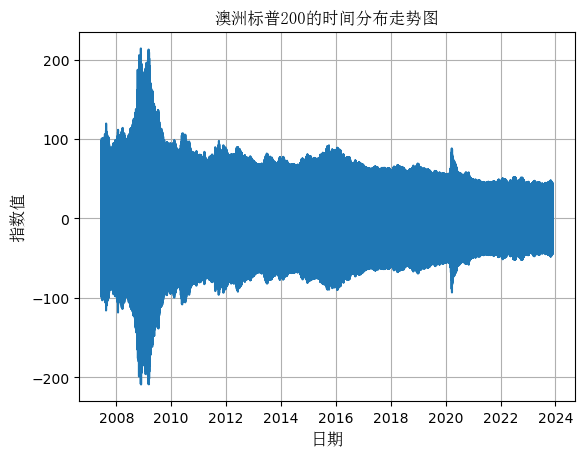

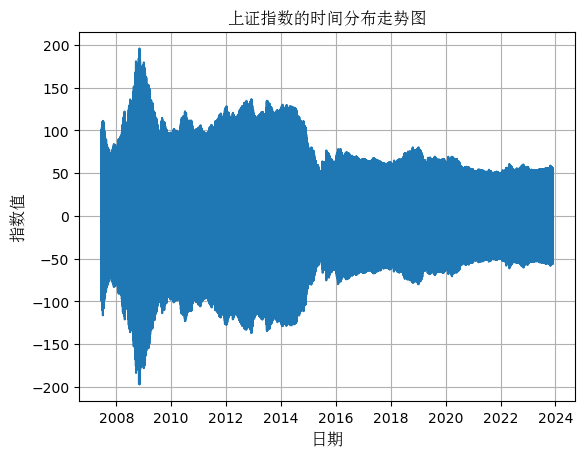

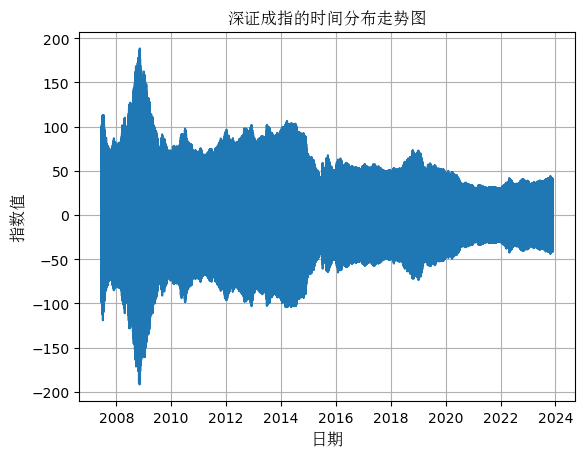

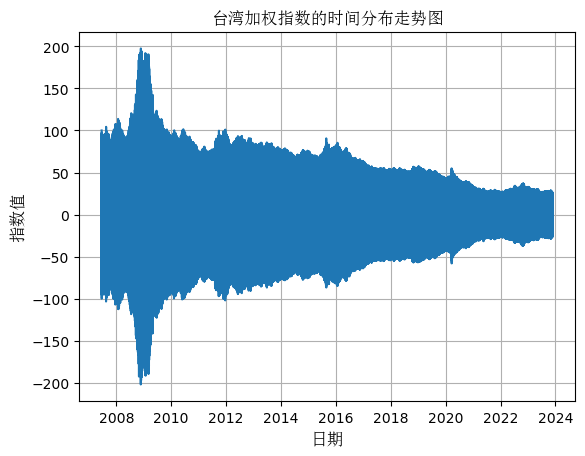

In [281]:
# 画图——巴西的数据太怪了，不管他
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r'C:\Windows\Fonts\simsun.ttc', size=12)


plt.figure(figsize=(14, 8))

for column in target1.columns:
    plt.plot(target1.index, target1[column])

    plt.title(f'{column}的时间分布走势图', fontproperties=font)
    plt.xlabel('日期', fontproperties=font)
    plt.ylabel('指数值', fontproperties=font)
    plt.grid(True)
    plt.show()


# 5.在上述指数中选出3-6只，利用月度收益率进行投资组合分析，在允许卖空和禁止卖空对条件下计算有效前沿和最小方差组合

In [282]:
#5.在上述指数中选出3-6只，利用月度收益率进行投资组合分析，在允许卖空和禁止卖空的条件下计算有效前沿和最小方差组合。

In [283]:
import pandas as pd
import numpy as np
from datetime import datetime
import scipy as sp
import scipy.optimize as scopt
import scipy.stats as spstats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from ipywidgets import interact, FloatSlider 

In [284]:
data=pd.read_excel('全球重要指数.xlsx')
data=data.iloc[1:]
columns=data.iloc[0]
data.columns=columns
data=data.iloc[2:]
start_date=datetime(1900,1,1)
data['日期']=data['日期'].apply(lambda x: (start_date+timedelta(days=x)))
data.index=data['日期']
data.drop('日期',axis=1,inplace=True)
data=data.fillna(0)

In [311]:
#引入老师上课讲过的函数：
def calc_returns(closes,freq="W-FRI",tye="simple"): 
    returndaily=np.log(closes.astype('float')).diff()
    returns=returndaily.resample(freq).sum() 
    if tye=="simple":
        return np.exp(returns)-1
    elif tye=="log":
        return returns
    
def objfunvar(W, R, target_ret):
    #stock_mean = np.mean(R,axis=0)
    #port_mean = np.dot(W,stock_mean) # portfolio mean
    cov=np.cov(R.T) # var-cov matrix
    port_var = np.dot(np.dot(W,cov),W.T) # portfolio variance
    #penalty = 2000*abs(port_mean-target_ret)# penalty 4 deviation
    #return np.sqrt(port_var) + penalty # objective function
    return np.sqrt(port_var)
    
def calc_efficient_frontier(returns,sellshort=True):
    result_means = []
    result_stds = []
    result_weights = []
    
    means = returns.mean()
    min_mean, max_mean = means.min(), means.max()
    
    nstocks = returns.columns.size
    if sellshort:
        bounds=None
    else:
        bounds = [(0,1) for i in np.arange(nstocks)]
    for r in np.linspace(min_mean, max_mean, 100):
        weights = np.ones(nstocks)/nstocks        
        constraints = ({'type': 'eq', 
                        'fun': lambda W: np.sum(W) - 1},
                      {'type': 'eq', 
                        'fun': lambda W: np.sum(W*means) -r})
        results = scopt.minimize(objfunvar, weights, (returns, r), 
                                 method='SLSQP', 
                                 constraints = constraints,
                                 bounds = bounds)
        if not results.success: # handle error
            raise Exception(results.message)
        result_means.append(np.round(r,4)) # 4 decimal places
        #std_=np.round(np.std(np.sum(returns*results.x,axis=1)),6)
        std_=objfunvar(results.x,returns,r)
        result_stds.append(std_)        
        result_weights.append(np.round(results.x, 5))
    return {'Means': result_means, 
            'Stds': result_stds, 
            'Weights': result_weights}

def calc_portfolio_std(returns=None,sigma=None, weights=None):
    if weights is None: 
        weights = np.ones(returns.columns.size) / \
        returns.columns.size
    if returns is not None:
        sigma = returns.cov()
    ## the the same result as the  matrix dot
    var = weights.dot(sigma).dot(weights)
    return np.sqrt(var)

def negative_sharpe_ratio( weights,means,sig,risk_free_rate = 0.015):
    # get the portfolio variance
    std = calc_portfolio_std(sigma=sig, weights=weights)  
    # and return the sharpe ratio
    return -((means.dot(weights) - risk_free_rate)/(std))

def optimize_portfolio(returns, risk_free_rate,sellshort=True):
    """ 
    Performs the optimization
    """
    means=returns.mean()
    sig=returns.cov()
    if sellshort:
        bounds=None
    else:
        bounds = [(0,1) for i in np.arange(returns.columns.size)]
        
    weights = np.ones(returns.columns.size, 
                 dtype=float) * 1.0 / returns.columns.size
    # minimize the negative sharpe value
    
    
    constraints = ({'type': 'eq', 
                        'fun': lambda W: np.sum(W) - 1})
    results = scopt.minimize(negative_sharpe_ratio, weights, (means,sig, risk_free_rate), 
                                 method='SLSQP', 
                                 constraints = constraints,
                                 bounds = bounds)
    if not results.success: # handle error
        raise Exception(results.message)
    mean_sharpe=results.x.dot(means)    
    std_sharpe=calc_portfolio_std(sigma=sig,weights=results.x)
    return {'Means': mean_sharpe, 
            'Stds': std_sharpe, 
            'Weights': results.x}

In [312]:
# 选择'道琼斯工业指数', '纳斯达克指数', '标普500'
target=data[['道琼斯工业指数','纳斯达克指数','标普500']]
target

1,道琼斯工业指数,纳斯达克指数,标普500
日期,,,
2000-01-06,91060.743612,32305.212862,11586.917716
2000-01-07,92094.512534,32105.643446,11609.330589
2000-01-08,93174.824946,30859.890974,11620.285310
2000-01-09,95403.340032,32146.928814,11934.939159
2000-01-12,95810.872680,33528.837798,12068.053440
...,...,...,...
2023-11-17,251068.929992,101197.872768,32309.064576
2023-11-18,250642.889028,101228.886708,32334.900576
2023-11-19,250669.849984,101319.242944,32378.162656


In [306]:
returns=calc_returns(target,freq='M')
returns#月简单收益率

1,道琼斯工业指数,纳斯达克指数,标普500
日期,,,
2000-01-31,-0.023732,-0.003928,-0.028231
2000-02-29,-0.081677,0.180924,-0.019739
2000-03-31,0.117479,0.011984,0.131572
2000-04-30,-0.025812,-0.168768,-0.037147
2000-05-31,-0.040809,-0.170073,-0.051541
...,...,...,...
2023-07-31,0.036375,0.042188,0.035843
2023-08-31,-0.010039,-0.019043,-0.011404
2023-09-30,-0.034751,-0.053947,-0.044713


In [307]:
x=calc_efficient_frontier(returns)
x1=calc_efficient_frontier(returns,sellshort=False)

<Axes: title={'center': 'not short'}>

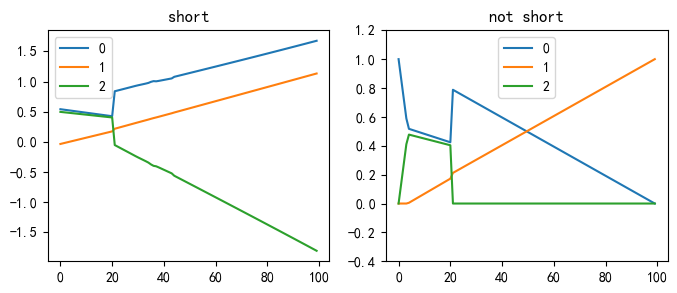

In [313]:
plt.figure(figsize=(8, 3))
ax1=plt.subplot(121)
pd.DataFrame(x['Weights']).plot(ax=ax1,title="short")
ax2=plt.subplot(122)
pd.DataFrame(x1['Weights']).plot(ax=ax2,title="not short",ylim=(-0.4,1.2))

Text(0, 0.5, 'Weights')

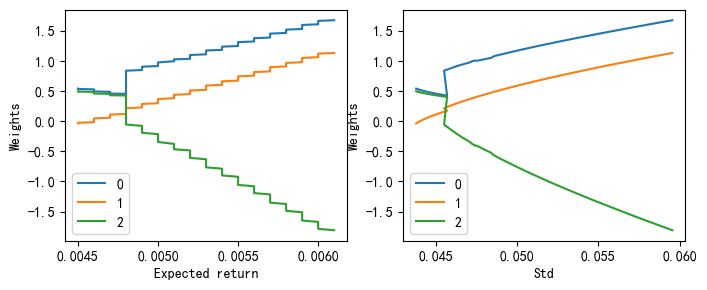

In [314]:
plt.figure(figsize=(8, 3))
ax1=plt.subplot(121)
pd.DataFrame(x['Weights'],index=x['Means']).plot(ax=ax1,label=["x","y"])
ax2=plt.subplot(122)
pd.DataFrame(x['Weights'],index=x['Stds']).plot(ax=ax2)
ax1.set_xlabel("Expected return")
ax2.set_xlabel("Std")
ax1.set_ylabel("Weights")
ax2.set_ylabel("Weights")

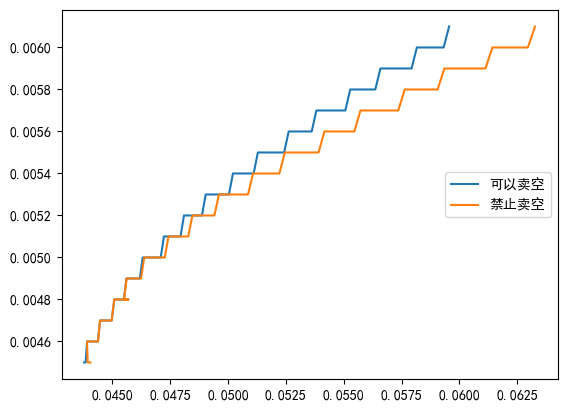

In [315]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置  
plt.rcParams['axes.unicode_minus'] = False  
plt.figure()
plt.plot(x["Stds"],x["Means"],label="可以卖空")
plt.plot(x1["Stds"],x1["Means"],label="禁止卖空")
plt.legend(loc="center right")

# 6.重新考虑上述投资组合分析，将数据分为2组（按时间先后等分），分析投资组合的变化

In [318]:
#6.重新考虑上述投资组合分析，将数据分为2组（按时间先后等分），分析投资组合的变化

In [319]:
target=data[['道琼斯工业指数','纳斯达克指数','标普500']]
target

1,道琼斯工业指数,纳斯达克指数,标普500
日期,,,
2000-01-06,91060.743612,32305.212862,11586.917716
2000-01-07,92094.512534,32105.643446,11609.330589
2000-01-08,93174.824946,30859.890974,11620.285310
2000-01-09,95403.340032,32146.928814,11934.939159
2000-01-12,95810.872680,33528.837798,12068.053440
...,...,...,...
2023-11-17,251068.929992,101197.872768,32309.064576
2023-11-18,250642.889028,101228.886708,32334.900576
2023-11-19,250669.849984,101319.242944,32378.162656


In [331]:
target1=target.loc["2000-01-06":"2011-01-02"]
target2=target.loc["2011-01-06":]
returns1=calc_returns(target1,freq='M')
returns2=calc_returns(target2,freq='M')

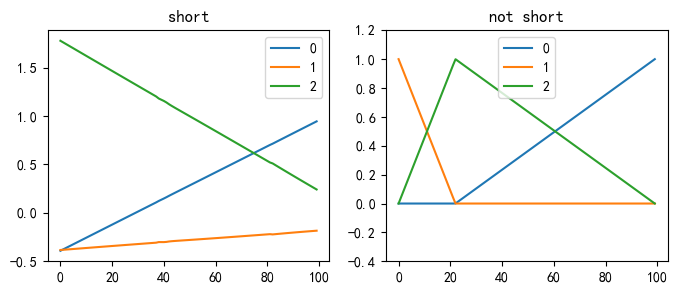

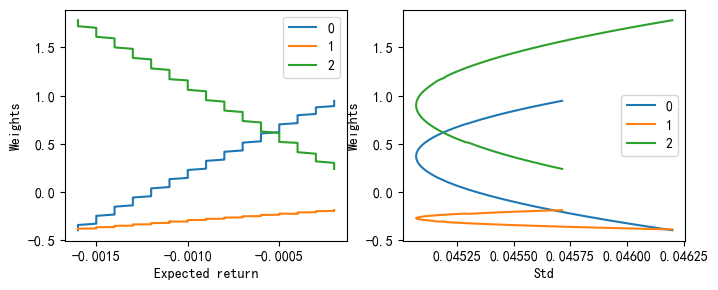

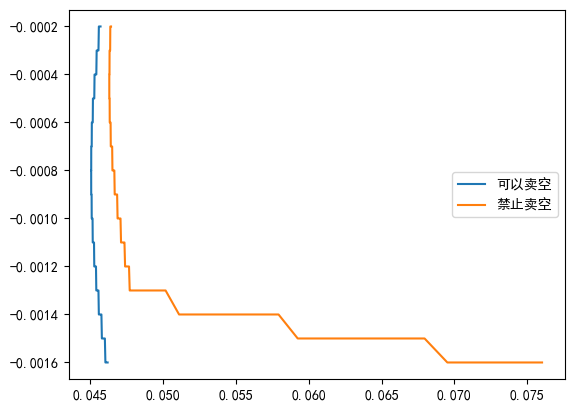

In [332]:
#对于第一段时间
x=calc_efficient_frontier(returns1)
x1=calc_efficient_frontier(returns1,sellshort=False)

plt.figure(figsize=(8, 3))
ax1=plt.subplot(121)
pd.DataFrame(x['Weights']).plot(ax=ax1,title="short")
ax2=plt.subplot(122)
pd.DataFrame(x1['Weights']).plot(ax=ax2,title="not short",ylim=(-0.4,1.2))

plt.figure(figsize=(8, 3))
ax1=plt.subplot(121)
pd.DataFrame(x['Weights'],index=x['Means']).plot(ax=ax1,label=["x","y"])
ax2=plt.subplot(122)
pd.DataFrame(x['Weights'],index=x['Stds']).plot(ax=ax2)
ax1.set_xlabel("Expected return")
ax2.set_xlabel("Std")
ax1.set_ylabel("Weights")
ax2.set_ylabel("Weights")

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置  
plt.rcParams['axes.unicode_minus'] = False  
plt.figure()
plt.plot(x["Stds"],x["Means"],label="可以卖空")
plt.plot(x1["Stds"],x1["Means"],label="禁止卖空")
plt.legend(loc="center right")

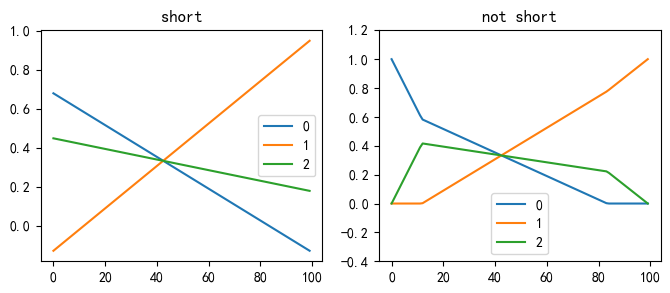

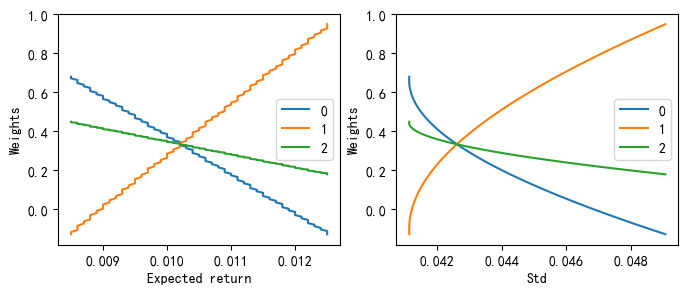

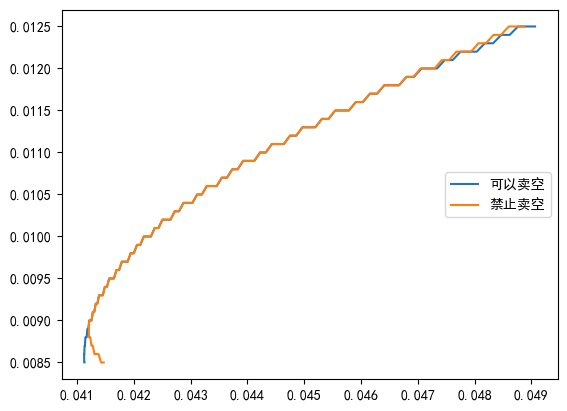

In [333]:
#对于第二段时间
x=calc_efficient_frontier(returns2)
x1=calc_efficient_frontier(returns2,sellshort=False)

plt.figure(figsize=(8, 3))
ax1=plt.subplot(121)
pd.DataFrame(x['Weights']).plot(ax=ax1,title="short")
ax2=plt.subplot(122)
pd.DataFrame(x1['Weights']).plot(ax=ax2,title="not short",ylim=(-0.4,1.2))

plt.figure(figsize=(8, 3))
ax1=plt.subplot(121)
pd.DataFrame(x['Weights'],index=x['Means']).plot(ax=ax1,label=["x","y"])
ax2=plt.subplot(122)
pd.DataFrame(x['Weights'],index=x['Stds']).plot(ax=ax2)
ax1.set_xlabel("Expected return")
ax2.set_xlabel("Std")
ax1.set_ylabel("Weights")
ax2.set_ylabel("Weights")

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置  
plt.rcParams['axes.unicode_minus'] = False  
plt.figure()
plt.plot(x["Stds"],x["Means"],label="可以卖空")
plt.plot(x1["Stds"],x1["Means"],label="禁止卖空")
plt.legend(loc="center right")